In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
url = 'https://data.gov.il/dataset/287f7e34-7675-49a9-90bd-7c6a8b55698e/resource/524aaf1e-7e4f-423b-9e0a-d40bbbacd2bc/download/divorces-city.csv'
df = pd.read_csv(url, encoding = 'cp1255', header=[1])
df.head()

,מקום מגורים של הזוג,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,אבו ג'ווייעד (שבט),NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,אבו גוש,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,אבו עמרה (שבט),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,אבטליון,2,1,NaN,NaN,2,1,1,NaN,2,NaN,1
4,אביאל,1,NaN,2,NaN,NaN,1,1,NaN,1,NaN,NaN


### data exploration

In [106]:
df.describe()

,מקום מגורים של הזוג,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,1065,382,466,623,609,636,652,673,707,732,682,710
unique,1065,64,80,78,80,77,88,88,89,87,88,86
top,כנף,1,1,1,1,1,1,1,1,1,1,1
freq,1,177,213,249,217,245,240,255,285,299,254,272


In [107]:
years = df.columns[1:].tolist()
years

['2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

### visualization

In [147]:
def plot_year(df, years):
    for year in years:
        print('year: ', year)
        cdf = df[['מקום מגורים של הזוג', year]]
        cdf[year] = pd.to_numeric(cdf[year], errors='coerce')
        cdf = cdf[cdf[year] != 0]
        cdf = cdf.dropna()
        cdf = cdf.sort_values(year)
        cdf_top_10 = cdf.tail(10)
        cdf_top_10.plot.bar(x='מקום מגורים של הזוג', y=year, rot=-70, figsize=(10,10), fontsize=14)  
        plt.show()

year:  2005


/Users/zeev/.virtualenvs/science/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


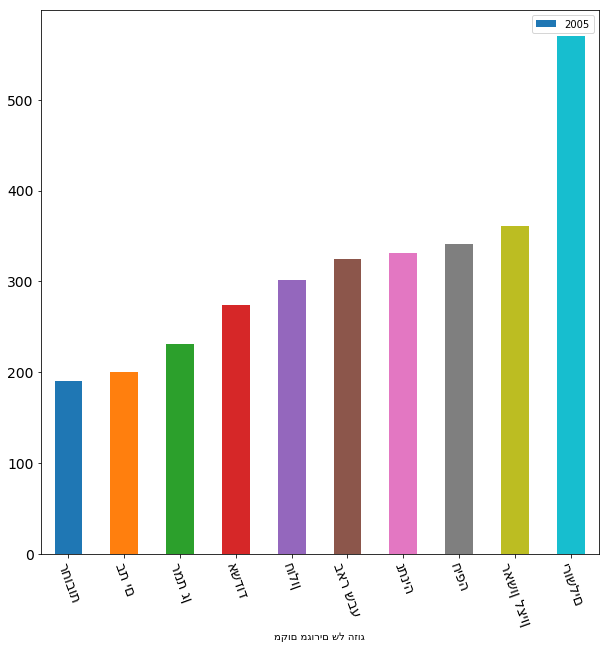

year:  2006


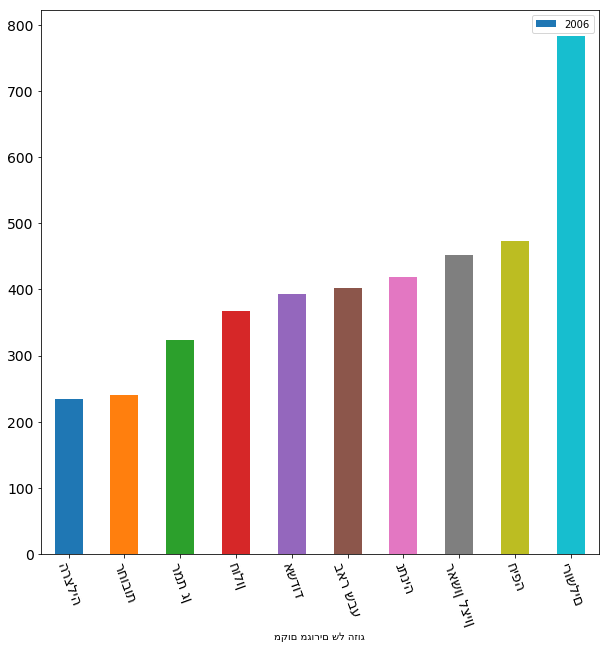

year:  2007


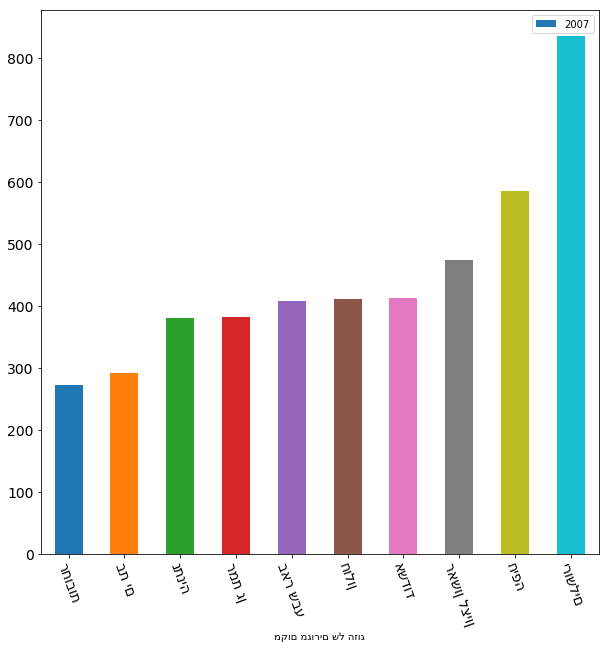

year:  2008


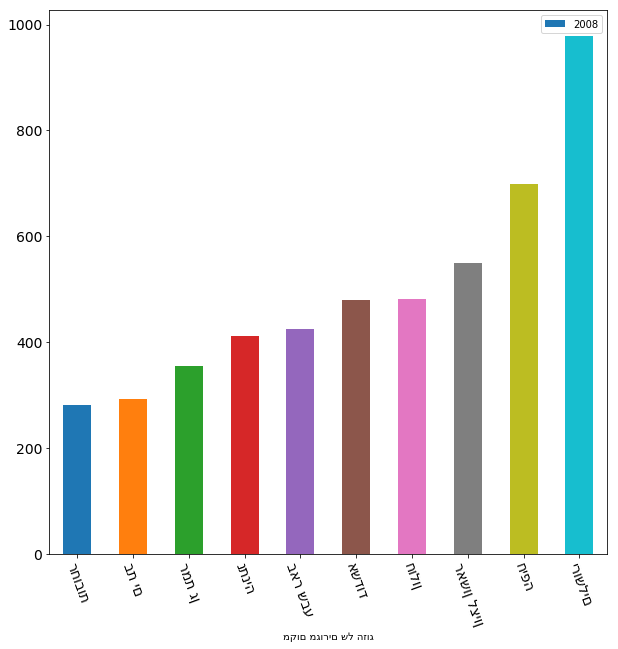

year:  2009


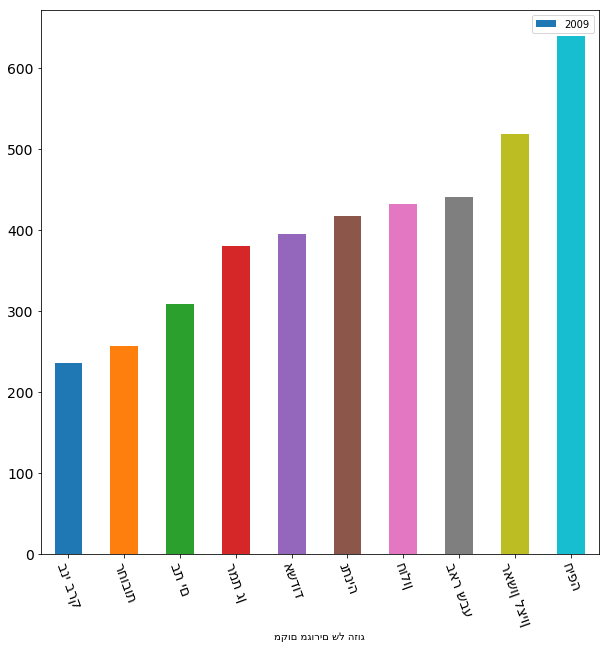

year:  2010


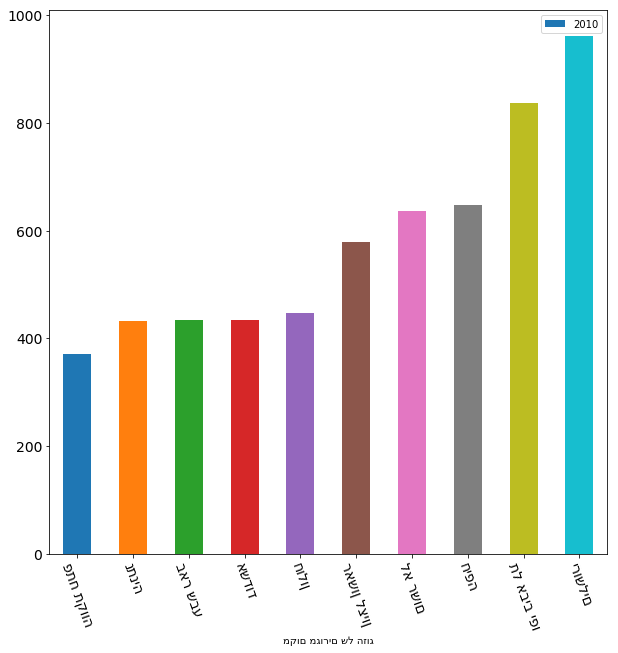

year:  2011


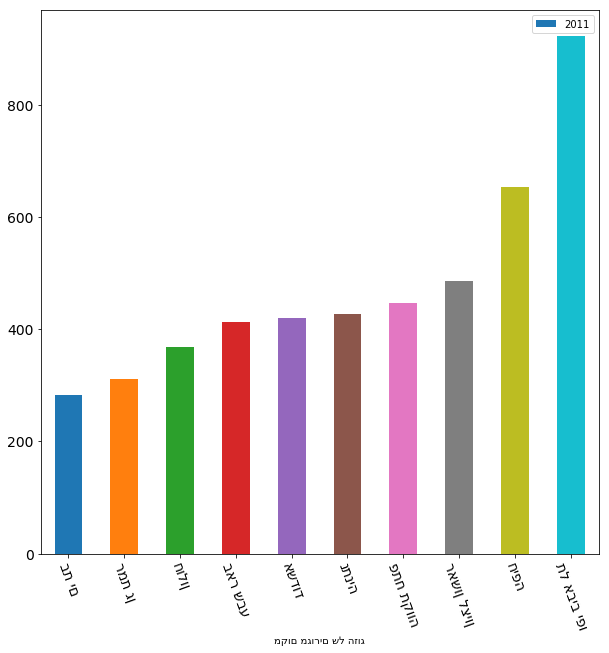

year:  2012


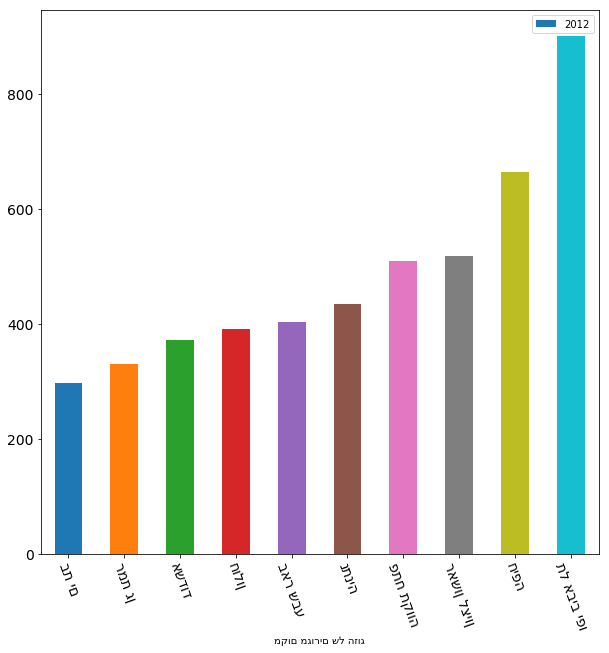

year:  2013


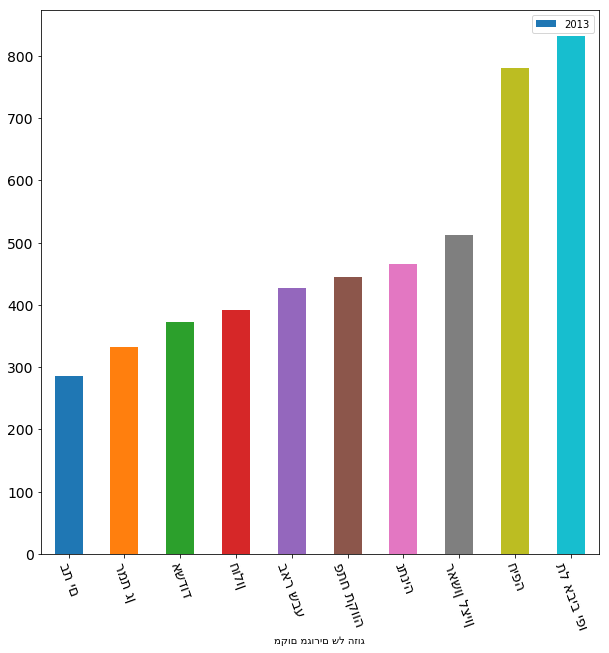

year:  2014


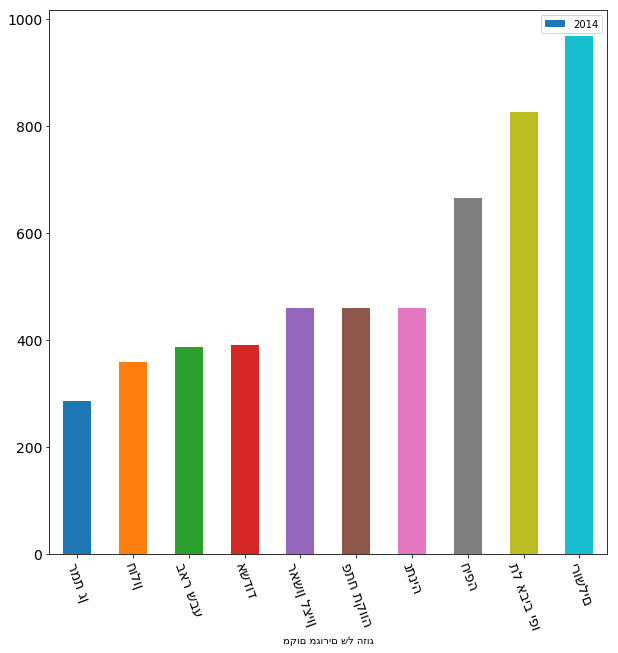

year:  2015


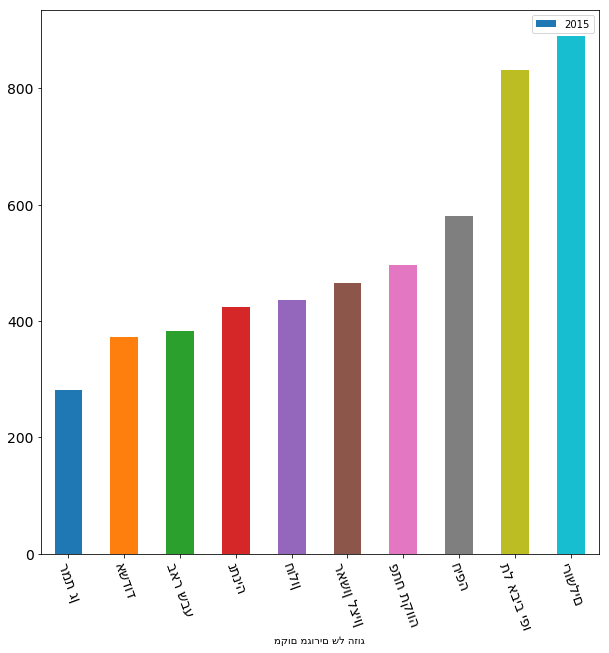

In [148]:
plot_year(df, years)

#### in Holon

/Users/zeev/.virtualenvs/science/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


x  ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
y  [302, 367, 411, 481, 432, 447, 368, 391, 392, 359, 436]


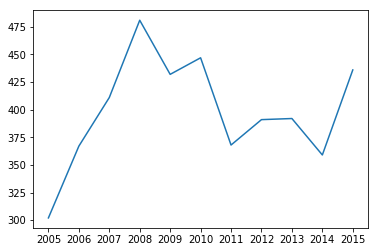

In [198]:
# Line plots to see year with num of divorce linear
hdf = df[df['מקום מגורים של הזוג'] == 'חולון']
for year in years:
    hdf[year] = pd.to_numeric(hdf[year], errors='coerce')

h_val = []
for row in hdf[years].iterrows():
    index, data = row
    data = data.tolist()

print('x ', years)
print('y ', data)
plt.plot(years, data)
plt.title('num of divorce in Holon')
plt.ylabel('num of divorce')
plt.show()